6091


Processing grayscale images SSIM: 100%|██████████| 6091/6091 [01:06<00:00, 91.47it/s]


Average SSIM for original images: 0.3601
Average SSIM for grayscale images: 0.4793
Median SSIM for original images: 0.3410
Median SSIM for grayscale images: 0.4846


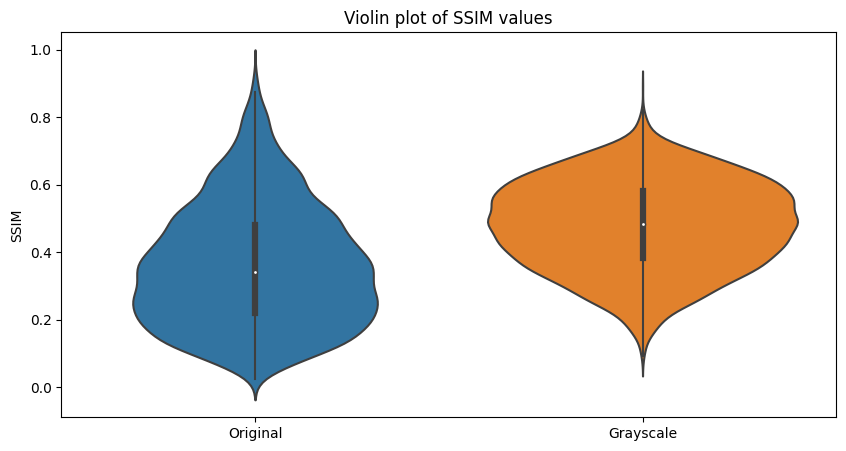

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io, img_as_float
from skimage.metrics import structural_similarity as ssim
from pathlib import Path
import numpy as np
from skimage.transform import resize
from tqdm import tqdm
def load_subdirs(dataset_path):
    dataset_path = Path(dataset_path)
    subdirs = [subdir for subdir in dataset_path.iterdir() if subdir.is_dir()]
    subdir_names = [subdir.name for subdir in subdirs]
    return subdir_names, subdirs

# 2. 查找交集
dataset1_path = '/home/workstation/code/XAImethods/CAIN/results/imagenet/val_images10k_attack/defocus_blur/1_vit/google/vit-large-patch32-384/GradCAM'
dataset2_path = '/home/workstation/code/XAImethods/CAIN/results/imagenet/val_images10k_vit/google/vit-large-patch32-384/GradCAM'

subdir_names1, subdirs1 = load_subdirs(dataset1_path)
subdir_names2, subdirs2 = load_subdirs(dataset2_path)

common_subdir_names = set(subdir_names1).intersection(subdir_names2)
common_subdirs1 = [subdirs1[subdir_names1.index(subdir_name)] for subdir_name in common_subdir_names]
common_subdirs2 = [subdirs2[subdir_names2.index(subdir_name)] for subdir_name in common_subdir_names]
print(len(common_subdir_names))



def compute_ssim_for_subdir(subdir1, subdir2):
    grayscale1_path = subdir1 / "grayscale.jpg"
    grayscale2_path = subdir2 / "grayscale.jpg"
    
    try:
        grayscale1 = img_as_float(io.imread(grayscale1_path, as_gray=True))
        grayscale2 = img_as_float(io.imread(grayscale2_path, as_gray=True))
        
        ssim_value = ssim(grayscale1, grayscale2, data_range=1.0)  # 添加了data_range参数
        return ssim_value
    except Exception as e:
        print(f"Error processing {subdir1.name}. Error: {e}")
        return None


def compute_ssim_for_original(subdir1, subdir2):
    original1_path = subdir1 / "original.jpg"
    original2_path = subdir2 / "original.jpg"
    
    try:
        original1 = img_as_float(io.imread(original1_path, as_gray=True))
        original2 = img_as_float(io.imread(original2_path, as_gray=True))
        
        # 确保两个图像具有相同的维度
        if original1.shape != original2.shape:
            original1 = resize(original1, original2.shape, mode='reflect')
        
        ssim_value = ssim(original1, original2, data_range=1.0)
        return ssim_value
    except Exception as e:
        print(f"Error processing {subdir1.name}. Error: {e}")
        return None

ssim_orig_values = [compute_ssim_for_original(subdir1, subdir2) for subdir1, subdir2 in tqdm(zip(common_subdirs1, common_subdirs2), total=len(common_subdirs1), desc="Processing original images SSIM")]
ssim_orig_values = [val for val in ssim_orig_values if val is not None]

# 4. Compute SSIM for grayscale images with progress bar
ssim_gray_values = [compute_ssim_for_subdir(subdir1, subdir2) for subdir1, subdir2 in tqdm(zip(common_subdirs1, common_subdirs2), total=len(common_subdirs1), desc="Processing grayscale images SSIM")]
ssim_gray_values = [val for val in ssim_gray_values if val is not None]

# 4. Visualize and save results

# Average and Median SSIM
mean_ssim_orig = np.mean(ssim_orig_values)
mean_ssim_gray = np.mean(ssim_gray_values)

median_ssim_orig = np.median(ssim_orig_values)
median_ssim_gray = np.median(ssim_gray_values)

print(f"Average SSIM for original images: {mean_ssim_orig:.4f}")
print(f"Average SSIM for grayscale images: {mean_ssim_gray:.4f}")
print(f"Median SSIM for original images: {median_ssim_orig:.4f}")
print(f"Median SSIM for grayscale images: {median_ssim_gray:.4f}")

new_dir_name = "_".join(dataset1_path.split('/')[-5:-3]) + "_" + "_".join(dataset2_path.split('/')[-4:-2])+ "_" + dataset1_path.split('/')[-1]
results_path = Path(new_dir_name)
results_path.mkdir(exist_ok=True)  # 如果目录不存在则创建

# SSIM histogram
plt.figure(figsize=(10, 5))
sns.violinplot(data=[ssim_orig_values, ssim_gray_values])
plt.xticks([0, 1], ['Original', 'Grayscale'])
plt.title('Violin plot of SSIM values')
plt.ylabel('SSIM')
image_output_path = results_path / "output_ssim_violinplot.png"
plt.savefig(image_output_path)
plt.show()


output_filename = results_path / "ssim_values_stats.txt"
with open(output_filename, 'w') as outfile:
    outfile.write("STATISTICS:\n")
    outfile.write("====================\n")
    outfile.write(f"Average SSIM for original images: {mean_ssim_orig:.4f}\n")
    outfile.write(f"Average SSIM for grayscale images: {mean_ssim_gray:.4f}\n")
    outfile.write(f"Median SSIM for original images: {median_ssim_orig:.4f}\n")
    outfile.write(f"Median SSIM for grayscale images: {median_ssim_gray:.4f}\n\n")
    
    outfile.write("SSIM VALUES:\n")
    outfile.write("====================\n")
    outfile.write("Original Images:\n")
    outfile.write("--------------------\n")
    for value in ssim_orig_values:
        outfile.write(f"{value:.4f}\n")
        
    outfile.write("\nGrayscale Images:\n")
    outfile.write("--------------------\n")
    for value in ssim_gray_values:
        outfile.write(f"{value:.4f}\n")

    


Processing images for /home/workstation/code/XAImethods/CAIN/results/imagenet/val_images10k_vit/google/vit-large-patch32-384/GradCAM: 100%|██████████| 5065/5065 [00:37<00:00, 133.66it/s]
Processing images for /home/workstation/code/XAImethods/CAIN/results/imagenet/val_images10k_vit/google/vit-large-patch32-384/GradCAMPlusPlus: 100%|██████████| 5065/5065 [00:37<00:00, 135.49it/s]
Processing images for /home/workstation/code/XAImethods/CAIN/results/imagenet/val_images10k_vit/google/vit-large-patch32-384/HiResCAM: 100%|██████████| 5065/5065 [00:35<00:00, 141.30it/s]
Processing images for /home/workstation/code/XAImethods/CAIN/results/imagenet/val_images10k_vit/google/vit-large-patch32-384/LayerCAM: 100%|██████████| 5065/5065 [00:39<00:00, 129.76it/s]
Processing images for /home/workstation/code/XAImethods/CAIN/results/imagenet/val_images10k_vit/google/vit-large-patch32-384/XGradCAM: 100%|██████████| 5065/5065 [00:38<00:00, 131.24it/s]


NameError: name 'CAM_ALGORITHMS' is not defined

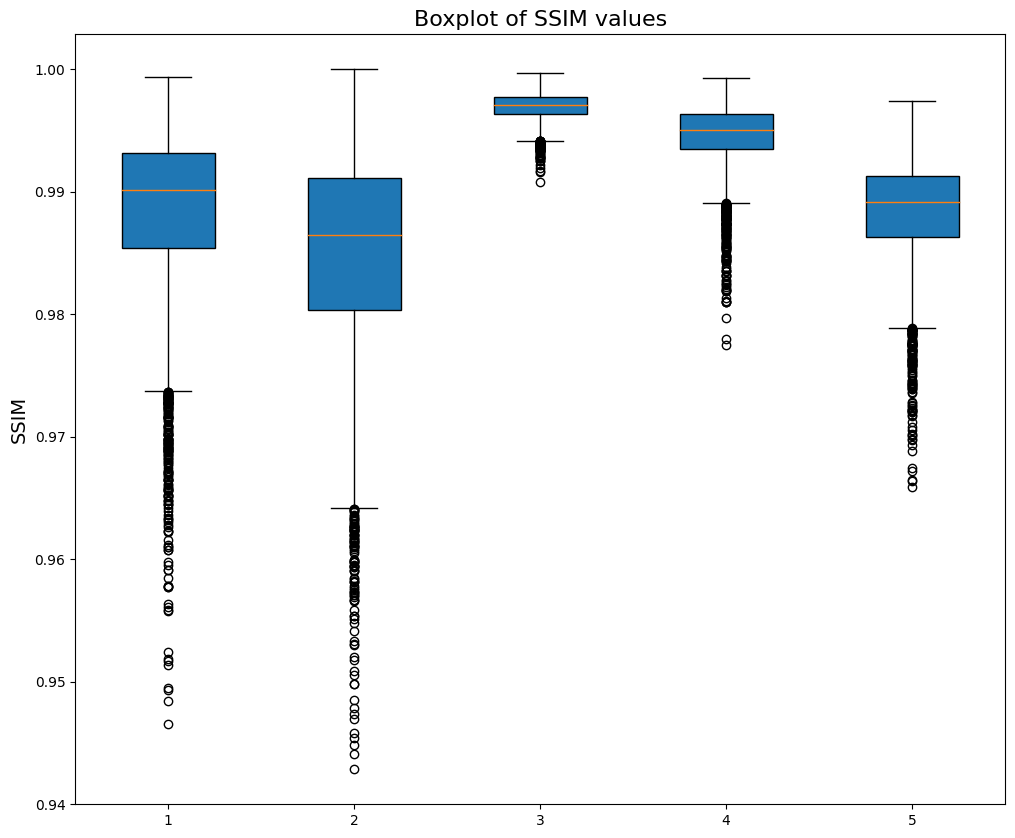

In [6]:
import numpy as np
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage.metrics import structural_similarity as compare_ssim

def load_subdirs(dataset_path):
    dataset_path = Path(dataset_path)
    subdirs = [subdir for subdir in dataset_path.iterdir() if subdir.is_dir()]
    subdir_names = [subdir.name for subdir in subdirs]
    return subdir_names, subdirs

def binarize(image, threshold=0.5):
    """Binarize an image based on a threshold."""
    binary_image = (image > threshold).astype(int)
    return binary_image

def area_ratio(image1, image2):
    """Compute the area ratio of two binarized images."""
    area1 = np.sum(image1)
    area2 = np.sum(image2)
    if area1 == 0:
        return float('inf') if area2 != 0 else 1.0
    return area2 / area1

def compute_ssim(image1, image2):
    """Compute the SSIM between two images."""
    return compare_ssim(image1, image2, data_range=1.0 if image1.dtype == np.float64 else 255)

def process_pair_ssim(results_images_path, results_attack_images_path):
    _, subdirs1 = load_subdirs(results_images_path)
    _, subdirs2 = load_subdirs(results_attack_images_path)

    file_names_path2 = [subdir.name for subdir in subdirs2]
    ssim_values = []

    for file_name in tqdm(file_names_path2, desc=f"Processing images for {results_images_path}"):
        subdir2 = Path(results_attack_images_path) / file_name
        subdir1 = Path(results_images_path) / file_name
        
        if not subdir1.exists():
            continue
        
        grayscale_path1 = subdir1 / "grayscale.npy" if (subdir1 / "grayscale.npy").exists() else subdir1 / "grayscale.jpg"
        grayscale_path2 = subdir2 / "grayscale.npy" if (subdir2 / "grayscale.npy").exists() else subdir2 / "grayscale.jpg"
        
        if grayscale_path1.suffix == ".npy":
            grayscale1 = np.load(grayscale_path1)
        else:
            grayscale1 = np.array(Image.open(grayscale_path1))
            
        if grayscale_path2.suffix == ".npy":
            grayscale2 = np.load(grayscale_path2)
        else:
            grayscale2 = np.array(Image.open(grayscale_path2))
        
        ssim_value = compute_ssim(grayscale1, grayscale2)
        ssim_values.append(ssim_value)
    return ssim_values


image_paths = [
    ("/home/workstation/code/XAImethods/CAIN/results/imagenet/val_images10k_vit/google/vit-large-patch32-384/GradCAM", "/home/workstation/code/XAImethods/CAIN/results/imagenet/val_images10k_attack/defocus_blur/3_vit/google/vit-large-patch32-384/GradCAM"),
    ("/home/workstation/code/XAImethods/CAIN/results/imagenet/val_images10k_vit/google/vit-large-patch32-384/GradCAMPlusPlus", "/home/workstation/code/XAImethods/CAIN/results/imagenet/val_images10k_attack/defocus_blur/3_vit/google/vit-large-patch32-384/GradCAMPlusPlus"),
    ("/home/workstation/code/XAImethods/CAIN/results/imagenet/val_images10k_vit/google/vit-large-patch32-384/HiResCAM", "/home/workstation/code/XAImethods/CAIN/results/imagenet/val_images10k_attack/defocus_blur/3_vit/google/vit-large-patch32-384/HiResCAM"),
    ("/home/workstation/code/XAImethods/CAIN/results/imagenet/val_images10k_vit/google/vit-large-patch32-384/LayerCAM", "/home/workstation/code/XAImethods/CAIN/results/imagenet/val_images10k_attack/defocus_blur/3_vit/google/vit-large-patch32-384/LayerCAM"),
    ("/home/workstation/code/XAImethods/CAIN/results/imagenet/val_images10k_vit/google/vit-large-patch32-384/XGradCAM", "/home/workstation/code/XAImethods/CAIN/results/imagenet/val_images10k_attack/defocus_blur/3_vit/google/vit-large-patch32-384/XGradCAM"),
]


all_ssim_values = []

for img_path, attack_path in image_paths:
    ssims = process_pair_ssim(img_path, attack_path)
    all_ssim_values.append(ssims)
CAM_ALGORITHMS = ["GradCAM", "GradCAMPlusPlus", "HiResCAM",  "LayerCAM", "XGradCAM"]
# Plotting
plt.figure(figsize=(12, 10))
plt.boxplot(all_ssim_values, vert=True, patch_artist=True)
plt.title("Boxplot of SSIM values", fontsize=16)
plt.ylabel("SSIM", fontsize=14)

# Use the CAM_ALGORITHMS names for the x-axis labels
plt.xticks(np.arange(1, len(CAM_ALGORITHMS) + 1), CAM_ALGORITHMS, fontsize=12, rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("boxplot_ssim_values.png", dpi=300)
plt.show()


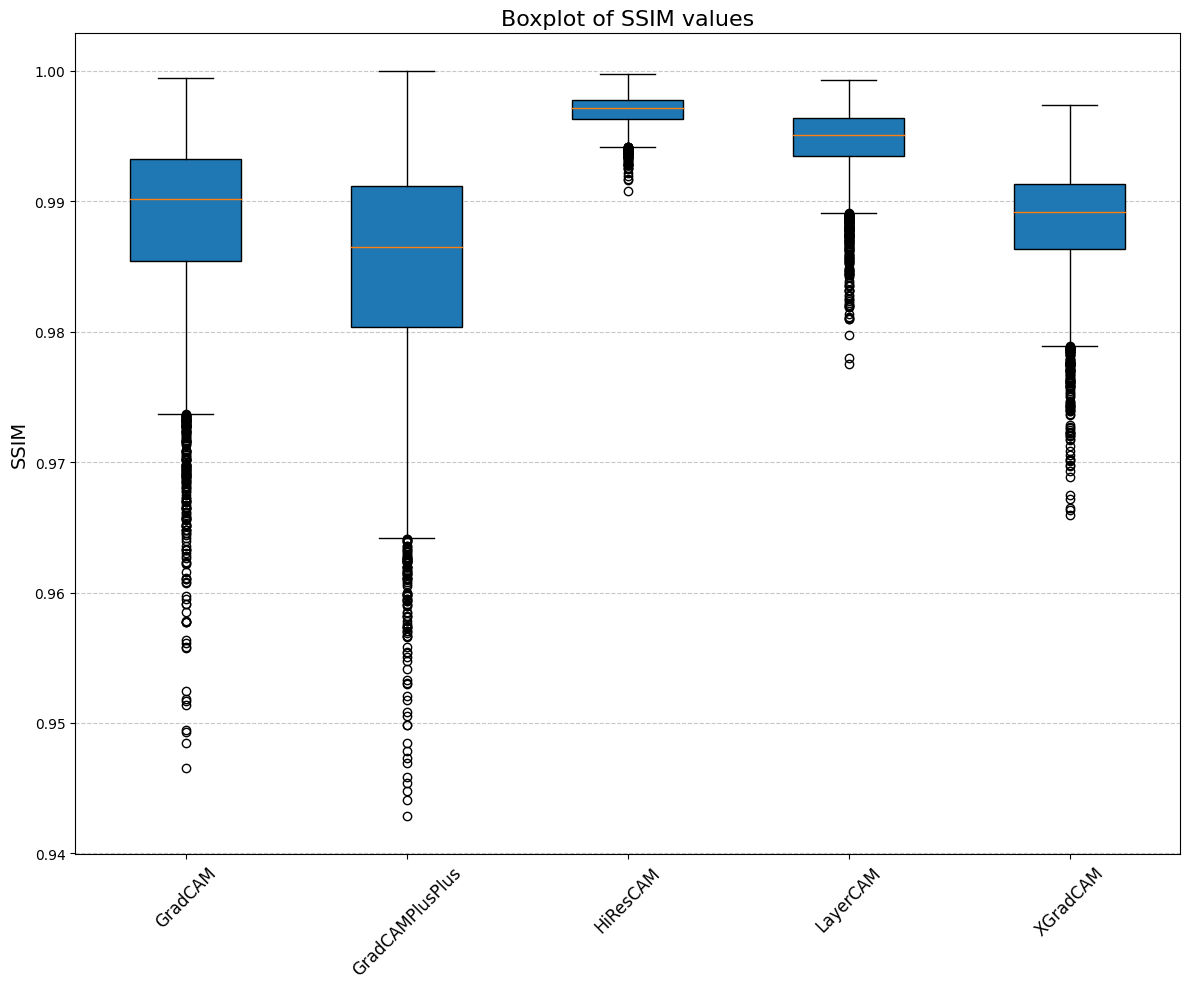

In [7]:
CAM_ALGORITHMS = ["GradCAM", "GradCAMPlusPlus", "HiResCAM",  "LayerCAM", "XGradCAM"]
# Plotting
plt.figure(figsize=(12, 10))
plt.boxplot(all_ssim_values, vert=True, patch_artist=True)
plt.title("Boxplot of SSIM values", fontsize=16)
plt.ylabel("SSIM", fontsize=14)

# Use the CAM_ALGORITHMS names for the x-axis labels
plt.xticks(np.arange(1, len(CAM_ALGORITHMS) + 1), CAM_ALGORITHMS, fontsize=12, rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("boxplot_ssim_values.png", dpi=300)
plt.show()

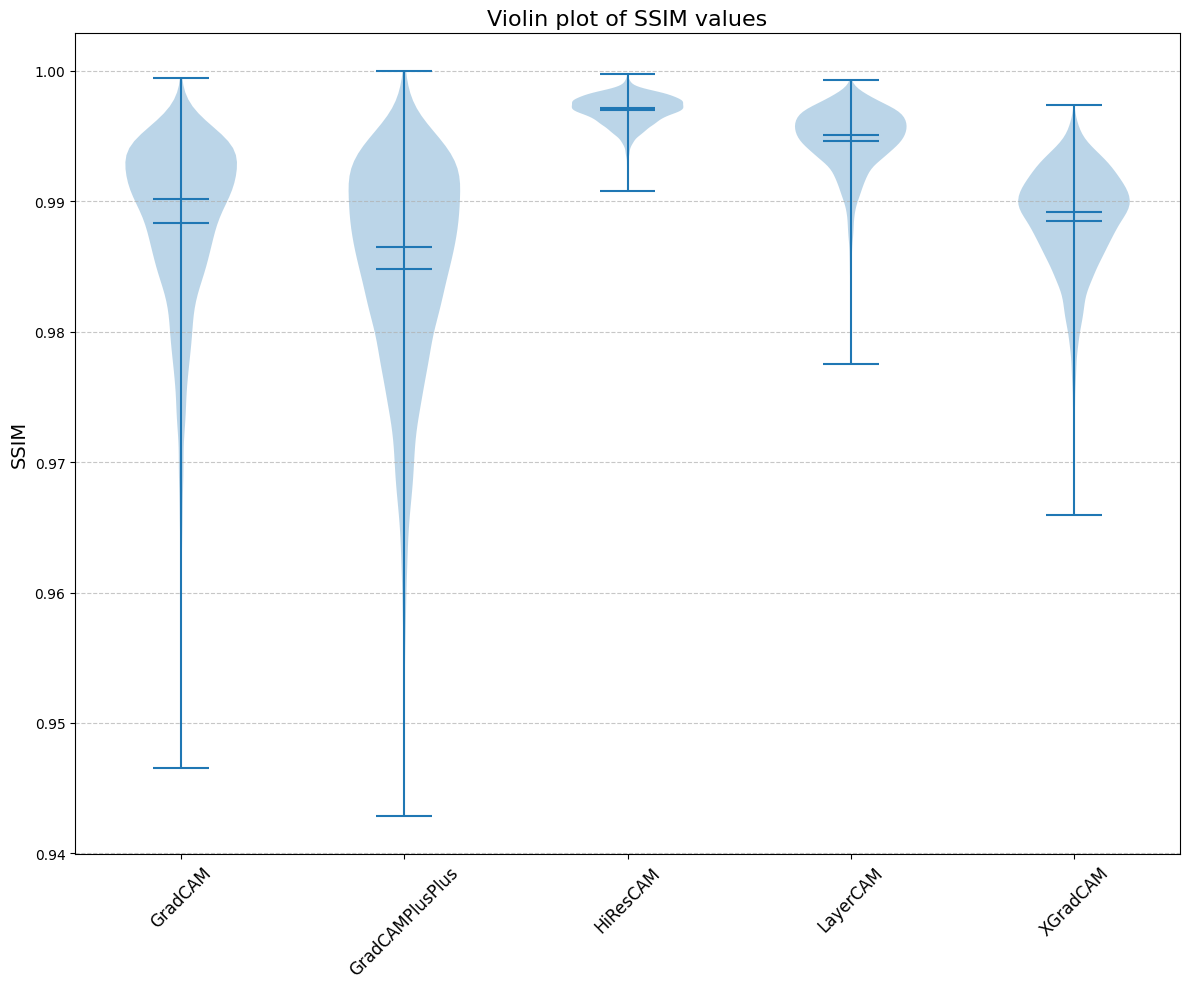

In [8]:
CAM_ALGORITHMS = ["GradCAM", "GradCAMPlusPlus", "HiResCAM",  "LayerCAM", "XGradCAM"]



# Plotting
plt.figure(figsize=(12, 10))
plt.violinplot(all_ssim_values, showmeans=True, showmedians=True, showextrema=True)
plt.title("Violin plot of SSIM values", fontsize=16)
plt.ylabel("SSIM", fontsize=14)

# Use the CAM_ALGORITHMS names for the x-axis labels
plt.xticks(np.arange(1, len(CAM_ALGORITHMS) + 1), CAM_ALGORITHMS, fontsize=12, rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("violinplot_ssim_values.png", dpi=300)
plt.show()


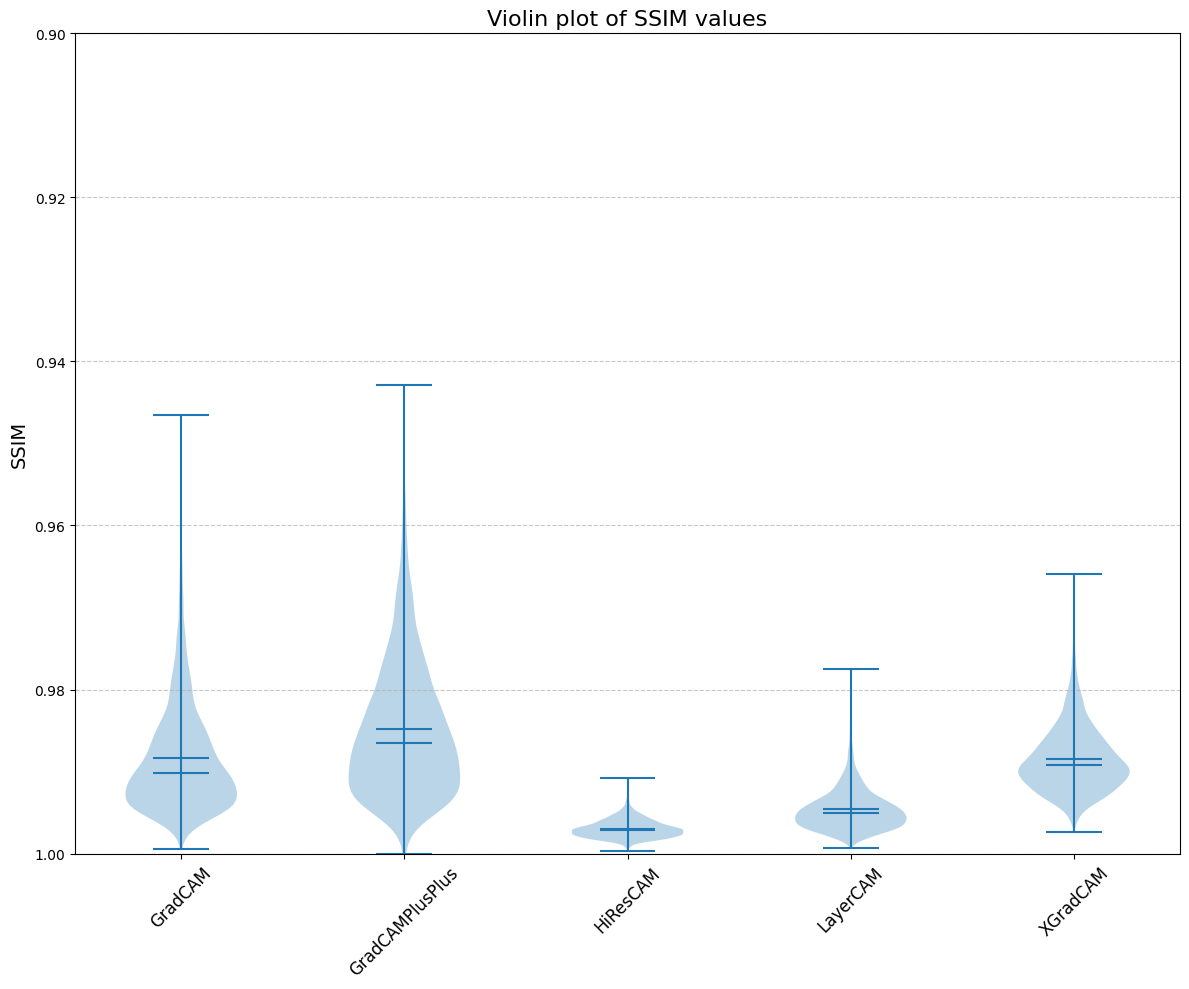

In [13]:
# Plotting
plt.figure(figsize=(12, 10))
plt.violinplot(all_ssim_values, showmeans=True, showmedians=True, showextrema=True)
plt.title("Violin plot of SSIM values", fontsize=16)
plt.ylabel("SSIM", fontsize=14)

# Setting the y-axis limits and reversing them
plt.ylim(0.9,1)  # Set the y-axis limits
plt.gca().invert_yaxis()  # Reverse the y-axis

# Use the CAM_ALGORITHMS names for the x-axis labels
plt.xticks(np.arange(1, len(CAM_ALGORITHMS) + 1), CAM_ALGORITHMS, fontsize=12, rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("violinplot_ssim_values.png", dpi=300)
plt.show()
